In [1]:
import pandas as pd
import gzip
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
steam_games = pd.read_json('../data/original/steam_games.json.gz',compression='gzip',lines=True)

In [3]:
steam_games.dropna(how='all', inplace=True)

In [4]:
# Completar los generos con las etiquetas de los Tags
steam_games['genres'] = steam_games['tags'].fillna(steam_games['genres'])

In [5]:
steam_games.dropna(subset=['app_name'], inplace=True)

In [6]:
# Funcion para extraer el numero de id de la url

def imputar_id(url):
    #buscamos el patron regular en la url
    patron = r"/app/(\d+)"

    #numero de id en url
    num = re.search(patron, url)

    #si es un numero lo retorna, sino sigue nulo
    if num:
        numero = num.group(1)
        return int(numero)
    else:
        return None 

In [7]:
steam_games.loc[steam_games['id'].isna(), 'id'] = steam_games.loc[steam_games['id'].isna(), 'url'].apply(imputar_id)

In [8]:
#Verifico que hay 2 id repetidos
steam_games['id'].value_counts()

id
200260.0    2
612880.0    2
530200.0    1
518690.0    1
513460.0    1
           ..
665950.0    1
430094.0    1
676060.0    1
494160.0    1
681550.0    1
Name: count, Length: 32131, dtype: int64

In [9]:
# borro esos registros con valores duplicados en id, app_name y release_date
steam_games.drop_duplicates(subset=['app_name','release_date','id'], inplace=True)

In [10]:
steam_games['app_name'].value_counts()

app_name
Soundtrack                           3
Goro                                 2
Puzzle Blocks                        2
WARZONE                              2
Mars 2030                            2
                                    ..
VR - Killing Town / 杀戮小镇             1
Lionheart                            1
Secret World Legends                 1
Graze Counter Original Soundtrack    1
Maze Run VR                          1
Name: count, Length: 32094, dtype: int64

In [11]:
# borro uno de los registros con valores duplicados en app_name y release_date ()
steam_games.drop_duplicates(subset=['app_name','release_date'], inplace=True)

In [12]:
# borro todos los registros nulos que no puedo imputar
steam_games.dropna(subset=['release_date','genres'],inplace=True)

In [13]:
steam_games[['genres', 'app_name','release_date','id']].isna().sum()

genres          0
app_name        0
release_date    0
id              0
dtype: int64

In [14]:
#creo una nueva columna con solo el año usando expresion regular
steam_games['year'] = steam_games['release_date'].str.extract(r'(\d{4})')


In [15]:
# borro los regisros sin año
steam_games.dropna(subset=['year'],inplace=True)

In [16]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29824 entries, 88310 to 120443
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     23887 non-null  object 
 1   genres        29824 non-null  object 
 2   app_name      29824 non-null  object 
 3   title         29824 non-null  object 
 4   url           29824 non-null  object 
 5   release_date  29824 non-null  object 
 6   tags          29800 non-null  object 
 7   reviews_url   29824 non-null  object 
 8   specs         29162 non-null  object 
 9   price         28698 non-null  object 
 10  early_access  29824 non-null  float64
 11  id            29824 non-null  float64
 12  developer     28601 non-null  object 
 13  year          29824 non-null  object 
dtypes: float64(2), object(12)
memory usage: 3.4+ MB


In [17]:
steam_games.isna().sum()

publisher       5937
genres             0
app_name           0
title              0
url                0
release_date       0
tags              24
reviews_url        0
specs            662
price           1126
early_access       0
id                 0
developer       1223
year               0
dtype: int64

In [18]:
steam_games['price']=pd.to_numeric(steam_games['price'], errors='coerce')

In [19]:
steam_games['year']=pd.to_numeric(steam_games['year'], errors='coerce')

In [20]:
# filtro solo aquellos años que tengan al menos 200 lanzamientos
years = steam_games['year'].value_counts() > 200
steam_games['year'][steam_games['year'].isin(years[years].index)].value_counts()

year
2017    9583
2016    6886
2015    4928
2014    2824
2013    1543
2012    1184
2011     582
2010     440
2009     339
2008     213
Name: count, dtype: int64

In [21]:
filtro = steam_games[(steam_games['year'] > 2008) & (steam_games['year'] < 2017)]
filtro.describe()

,price,early_access,id,year
count,17035.000000,18726.000000,1.872600e+04,18726.000000
mean,9.332960,0.036153,3.611653e+05,2014.512015
std,14.114305,0.186676,1.344394e+05,1.707516
min,0.490000,0.000000,3.000000e+02,2009.000000
25%,2.990000,0.000000,2.828650e+05,2014.000000
50%,4.990000,0.000000,3.689150e+05,2015.000000
75%,9.990000,0.000000,4.519150e+05,2016.000000
max,771.710000,1.000000,2.028850e+06,2016.000000


In [22]:
grouped_data = filtro.groupby('year')

# busco los precios medios y extremos para cada año
for year, group in grouped_data:
    describe_year = group.describe()
    print(f"\nEstadísticas descriptivas para el año {year}:\n{describe_year}")



Estadísticas descriptivas para el año 2009:
            price  early_access             id    year
count  325.000000         339.0     339.000000   339.0
mean     9.463169           0.0  110057.914454  2009.0
std      6.477873           0.0  164545.841571     0.0
min      0.990000           0.0     550.000000  2009.0
25%      4.990000           0.0   24020.000000  2009.0
50%      8.990000           0.0   35000.000000  2009.0
75%      9.990000           0.0   58365.000000  2009.0
max     54.990000           0.0  901735.000000  2009.0

Estadísticas descriptivas para el año 2010:
            price  early_access             id    year
count  426.000000         440.0     440.000000   440.0
mean     8.745869           0.0  131758.731818  2010.0
std      8.093659           0.0  189122.539951     0.0
min      0.990000           0.0     300.000000  2010.0
25%      3.990000           0.0   34272.750000  2010.0
50%      4.990000           0.0   45875.000000  2010.0
75%      9.990000           0.

In [23]:
steam_games['price'].sort_values(ascending=False).head(20)

100398    995.00
90702     771.71
111904    599.00
106104    499.99
102614    499.99
97385     399.99
97384     399.99
104156    399.00
97727     399.00
102065    399.00
100045    320.00
117876    299.99
105948    299.99
92755     299.99
115162    289.99
106103    249.99
95172     234.99
103704    202.76
103269    199.99
103734    199.99
Name: price, dtype: float64

In [24]:
# descarto todos los precios que superan los 200 dolares por considerarlos extremos.
df_filtrado = steam_games[steam_games['price'] <= 200]

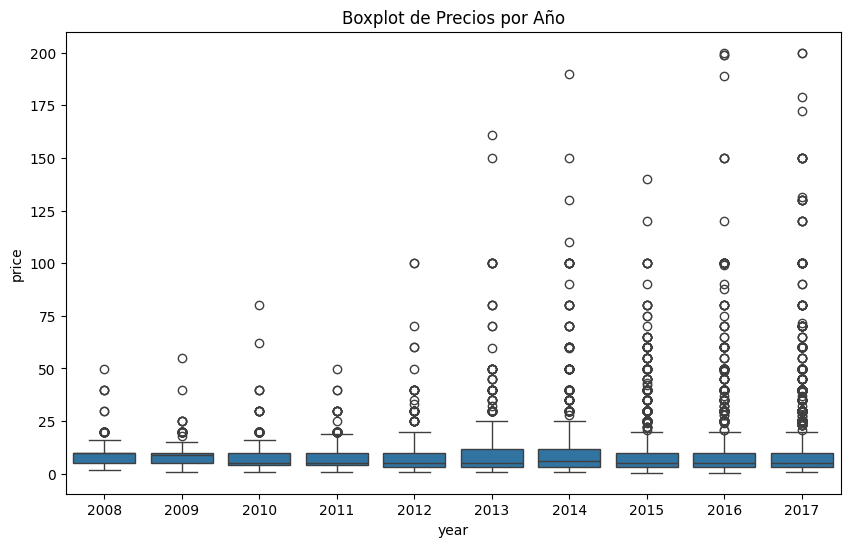

In [25]:
filtro = df_filtrado[(df_filtrado['year'] > 2007) & (df_filtrado['year'] < 2018)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='price', data=filtro)
plt.title('Boxplot de Precios por Año')
plt.show()


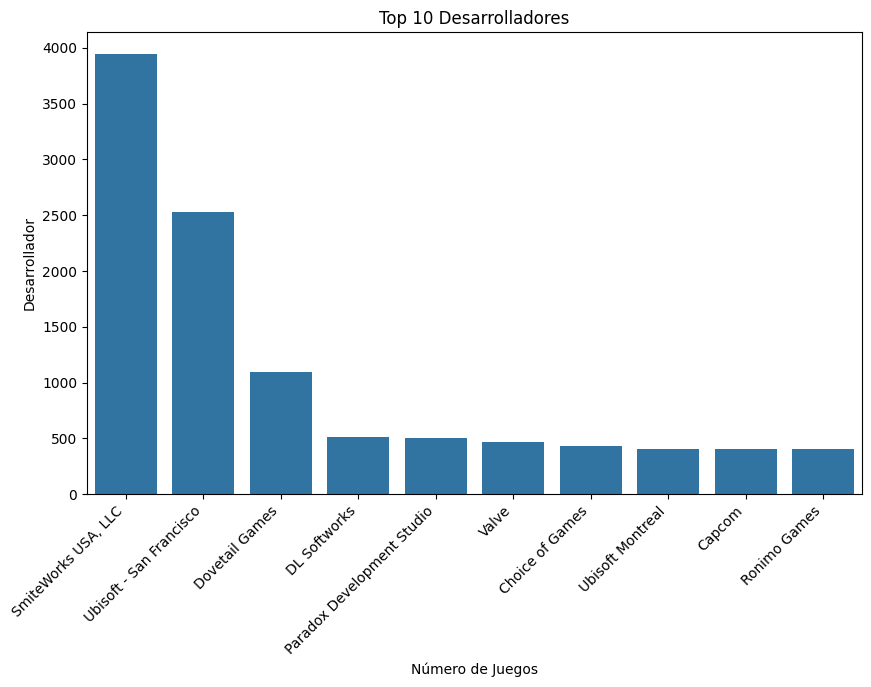

In [44]:

top_developers = steam_games['developer'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_developers.index, y=top_developers)
plt.title('Top 10 Desarrolladores')
plt.xlabel('Número de Juegos')
plt.ylabel('Desarrollador')
plt.xticks(rotation=45, ha='right') 
plt.show()


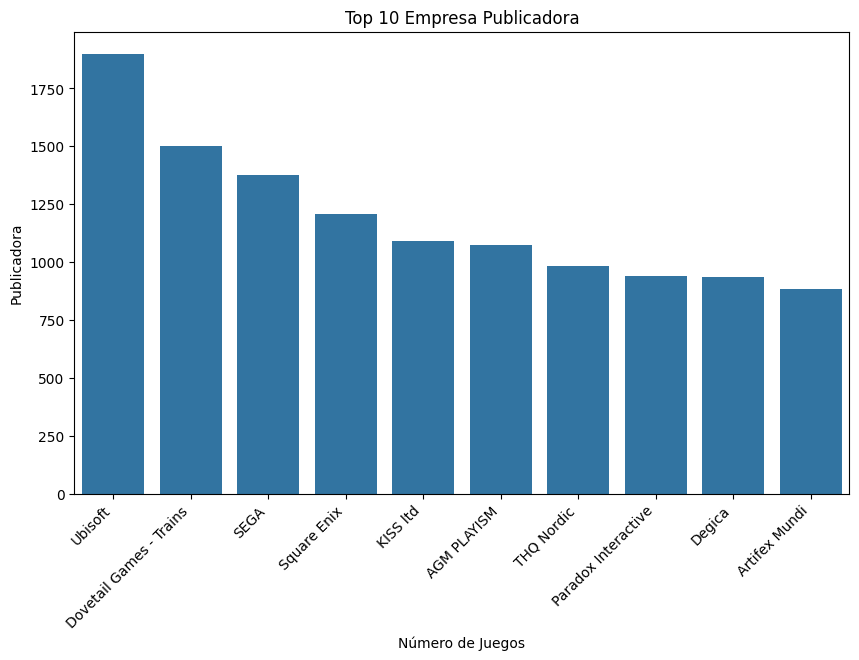

In [45]:
top_publisher = steam_games['publisher'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publisher.index, y=top_publisher)
plt.title('Top 10 Empresa Publicadora')
plt.xlabel('Número de Juegos')
plt.ylabel('Publicadora')
plt.xticks(rotation=45, ha='right') 
plt.show()

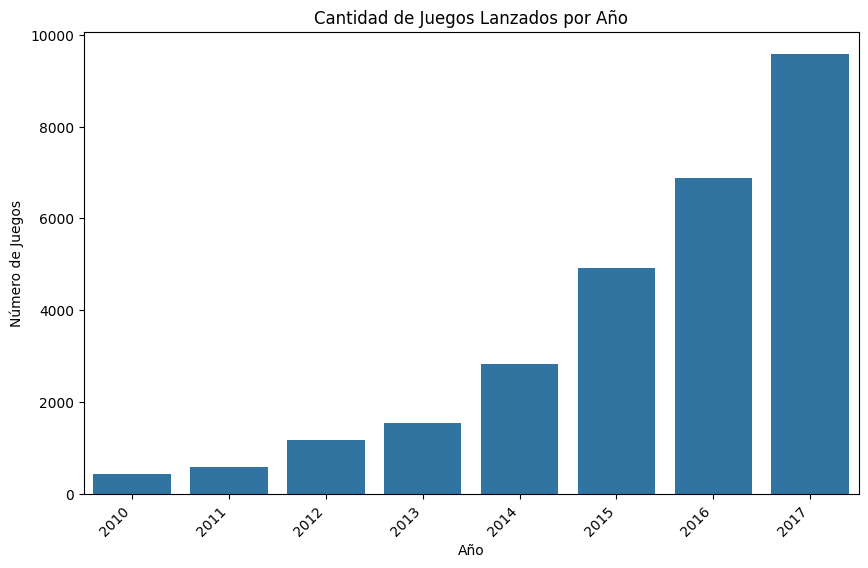

In [28]:
filtro = steam_games[(steam_games['year'] > 2009) & (steam_games['year'] < 2018)]
games_per_year = filtro['year'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
sns.barplot(x=games_per_year.index, y=games_per_year)
plt.title('Cantidad de Juegos Lanzados por Año')
plt.xlabel('Año')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [29]:
steam_games['genres'] = steam_games['genres'].apply(lambda x: str(x).replace("[", "").replace("]", ""))
steam_games['genres'] = steam_games['genres'].str.split(', ')
steam_games = steam_games.explode('genres')
steam_games['genres'] = steam_games['genres'].apply(lambda x: str(x).replace("'", ""))
steam_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer,year
88310,Kotoshiro,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro,2018
88310,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro,2018
88310,Kotoshiro,Indie,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro,2018
88310,Kotoshiro,Casual,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro,2018
88310,Kotoshiro,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120443,SIXNAILS,Casual,EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns",2017
120443,SIXNAILS,Puzzle,EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns",2017
120443,SIXNAILS,Singleplayer,EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns",2017
120443,SIXNAILS,Atmospheric,EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns",2017


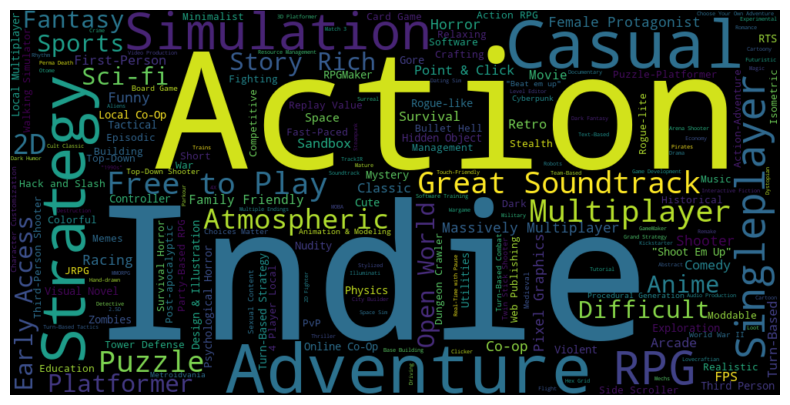

In [30]:
# Cuenta la frecuencia de cada género
generos = steam_games['genres'].value_counts()

# Crea la nube de palabras
wordcloud = WordCloud(width=1000, height=500, background_color='black').generate_from_frequencies(generos)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

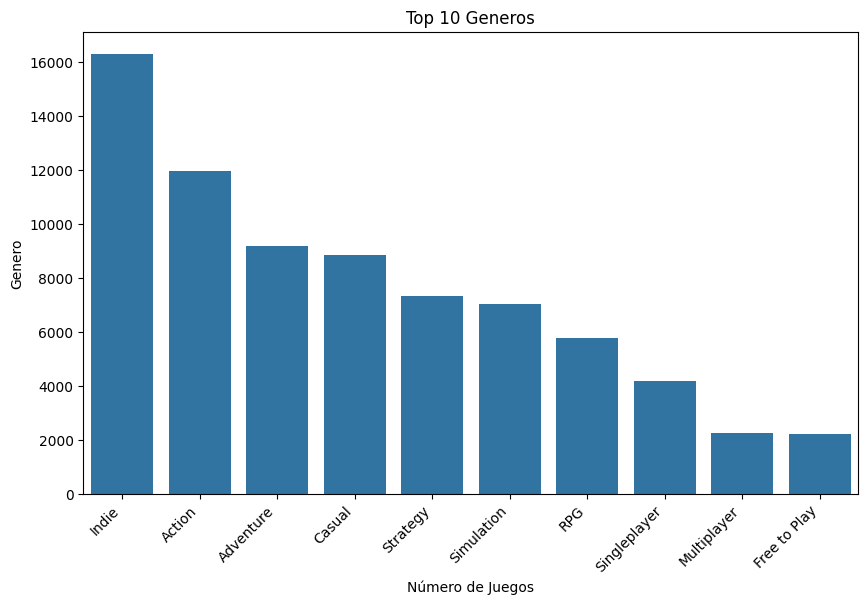

In [46]:

top_generos = steam_games['genres'].value_counts().head(10)

# Crea un gráfico de barras horizontal para los 10 principales generos
plt.figure(figsize=(10, 6))
sns.barplot(x=top_generos.index, y=top_generos)
plt.title('Top 10 Generos')
plt.xlabel('Número de Juegos')
plt.ylabel('Genero')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [32]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157858 entries, 88310 to 120443
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   publisher     139298 non-null  object 
 1   genres        157858 non-null  object 
 2   app_name      157858 non-null  object 
 3   title         157858 non-null  object 
 4   url           157858 non-null  object 
 5   release_date  157858 non-null  object 
 6   tags          157812 non-null  object 
 7   reviews_url   157858 non-null  object 
 8   specs         155949 non-null  object 
 9   price         141733 non-null  float64
 10  early_access  157858 non-null  float64
 11  id            157858 non-null  float64
 12  developer     154074 non-null  object 
 13  year          157858 non-null  int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 18.1+ MB


In [33]:
users_items = pd.read_csv('../data/limpio/users_items.csv.gz',compression='gzip')

In [34]:
users_items.columns

Index(['user_id', 'item_id', 'playtime_forever', 'playtime_2weeks'], dtype='object')

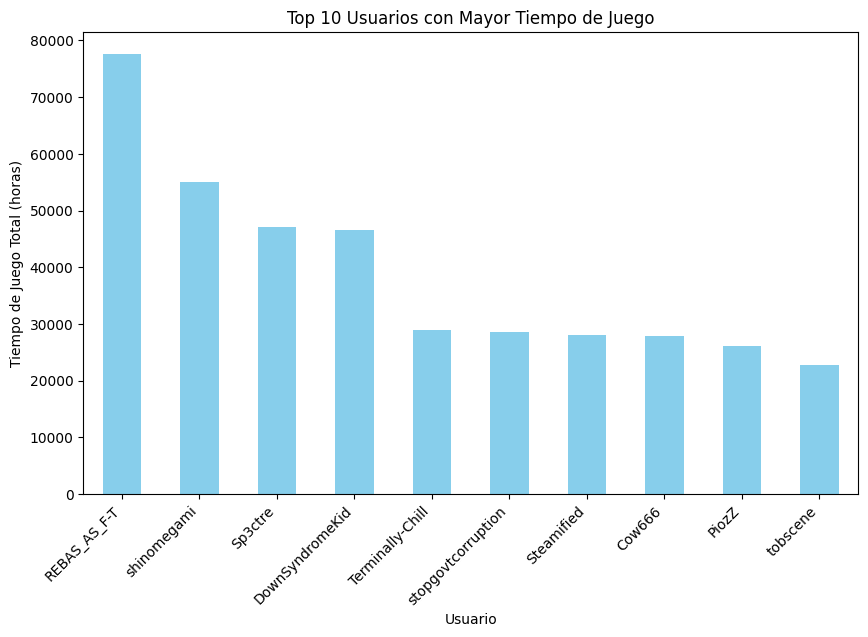

In [49]:
total_playtime = users_items.groupby('user_id')['playtime_forever'].sum()

# top 10 jugadores forever
top_users = total_playtime.sort_values(ascending=False).head(10)

# Crea un gráfico de barras para los 10 usuarios principales
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='skyblue')
plt.title('Top 10 Usuarios con Mayor Tiempo de Juego')
plt.xlabel('Usuario')
plt.ylabel('Tiempo de Juego Total (horas)')
plt.xticks(rotation=45, ha='right') 
plt.show()

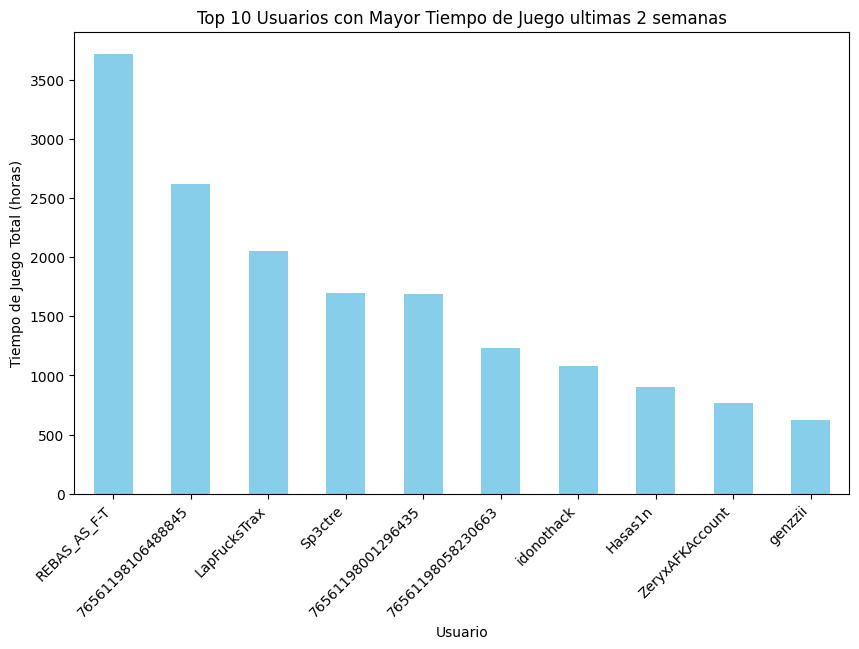

In [50]:
weeks2 = users_items.groupby('user_id')['playtime_2weeks'].sum()

# top 10 jugadores ultimas semanas
top_users = weeks2.sort_values(ascending=False).head(10)

# Crea un gráfico de barras para los 10 usuarios principales
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='skyblue')
plt.title('Top 10 Usuarios con Mayor Tiempo de Juego ultimas 2 semanas')
plt.xlabel('Usuario')
plt.ylabel('Tiempo de Juego Total (horas)')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [37]:
df_no_duplicates = steam_games[['id', 'app_name']].drop_duplicates()

In [38]:
todo=users_items.merge(df_no_duplicates, left_on='item_id', right_on='id')

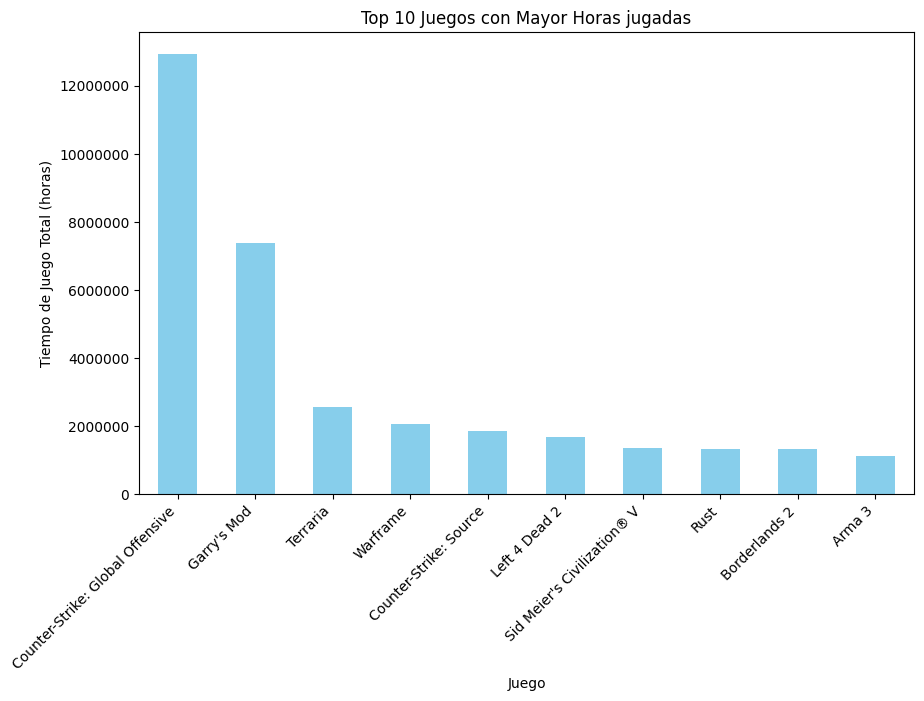

In [51]:
total_playtime_per_game = todo.groupby('app_name')['playtime_forever'].sum()

# Selecciona los 10 juegos con más tiempo de juego total
top_games = total_playtime_per_game.sort_values(ascending=False).head(10)

# Crea un gráfico de barras para los 10 juegos principales
plt.figure(figsize=(10, 6))
top_games.plot(kind='bar', color='skyblue')
plt.title('Top 10 Juegos con Mayor Horas jugadas')
plt.xlabel('Juego')
plt.ylabel('Tiempo de Juego Total (horas)')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [40]:
user_reviews = pd.read_csv('../data/limpio/user_reviews.csv.gz',compression='gzip')

In [41]:
user_reviews.columns

Index(['user_id', 'item_id', 'recommend', 'sentiment_analysis'], dtype='object')